In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
!ls ./../module1-logistic-regression/

README.md
TanzaniaWaterPumps.ipynb
logistic_regression_categorical_encoding.ipynb
sample_submission.csv
test_features.csv
train_features.csv
train_labels.csv


In [5]:
csv_path = './../module1-logistic-regression/'

In [6]:
train = pd.merge(pd.read_csv(csv_path+'train_features.csv'),
                 pd.read_csv(csv_path+'train_labels.csv')
                )


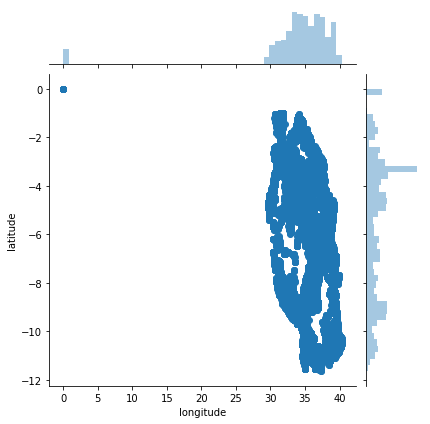

In [8]:
sns.jointplot(x='longitude', y='latitude', data=train);

THAT POINT AT 0 0 IS NOT IN TANZANIA, THAT IS NULL ISLAND, YOU MUST BE AWARE OF DATA HAVING 0 INSTEAD OF NULL. 0 IS NOT WHAT THEY MEAN BY 0, THEY REALLY MEAN NAN.

BELOW IS EVEN WORST, SOMETHING CLOSE TO 0, BUT NOT EVEN 0 INSTEAD OF NAN

In [9]:
train['latitude'].max()

-2e-08

YOUR DATA WRANGLING SHOULD BE A FUNCTION SO YOU CAN REUSE IT AND MERGE ON FUTURE DATA.

In [12]:
def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace them with the column mean.
    cols_with_zeros = ['construction_year', 'longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col] = X[col].fillna(X[col].mean())
        
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract year from date_recorded
    X['year_recorded'] = X['date_recorded'].dt.year
    
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group')
    
    # for categoricals with missing values, fill with the category 'MISSING'
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
    
    return X


train = wrangle(train)

ITS IMPORTANT TO CHOOSE THE DEPTH OF YOUR DECISION TREE WISELY, IT IS VERY EASY TO OVERFIT

LOGISTIC REGRESSION AND DECISION TREES ARE THE CURRENT TOOLS

the validation set is used to choose between models (for instance, does a random forest or a neural net work better for your problem? do you want a random forest with 40 trees or 50 trees?)